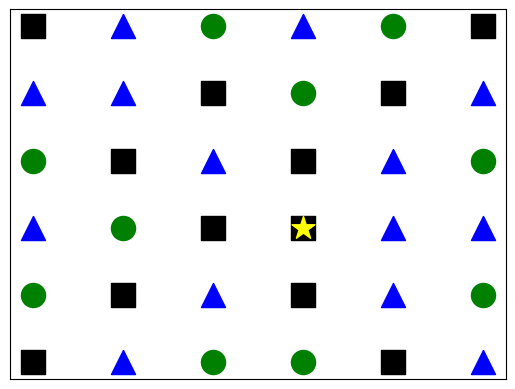

In [ ]:
#def gerar_matriz_aleatoria(min_tam=2, max_tam=6):

 #   n = random.randint(min_tam, max_tam)
  #  matriz = [[random.randint(1, 3) for _ in range(n)] for _ in range(n)]
   # return matriz, n

#MATRIZ, tamanho = gerar_matriz_aleatoria(2, 6)

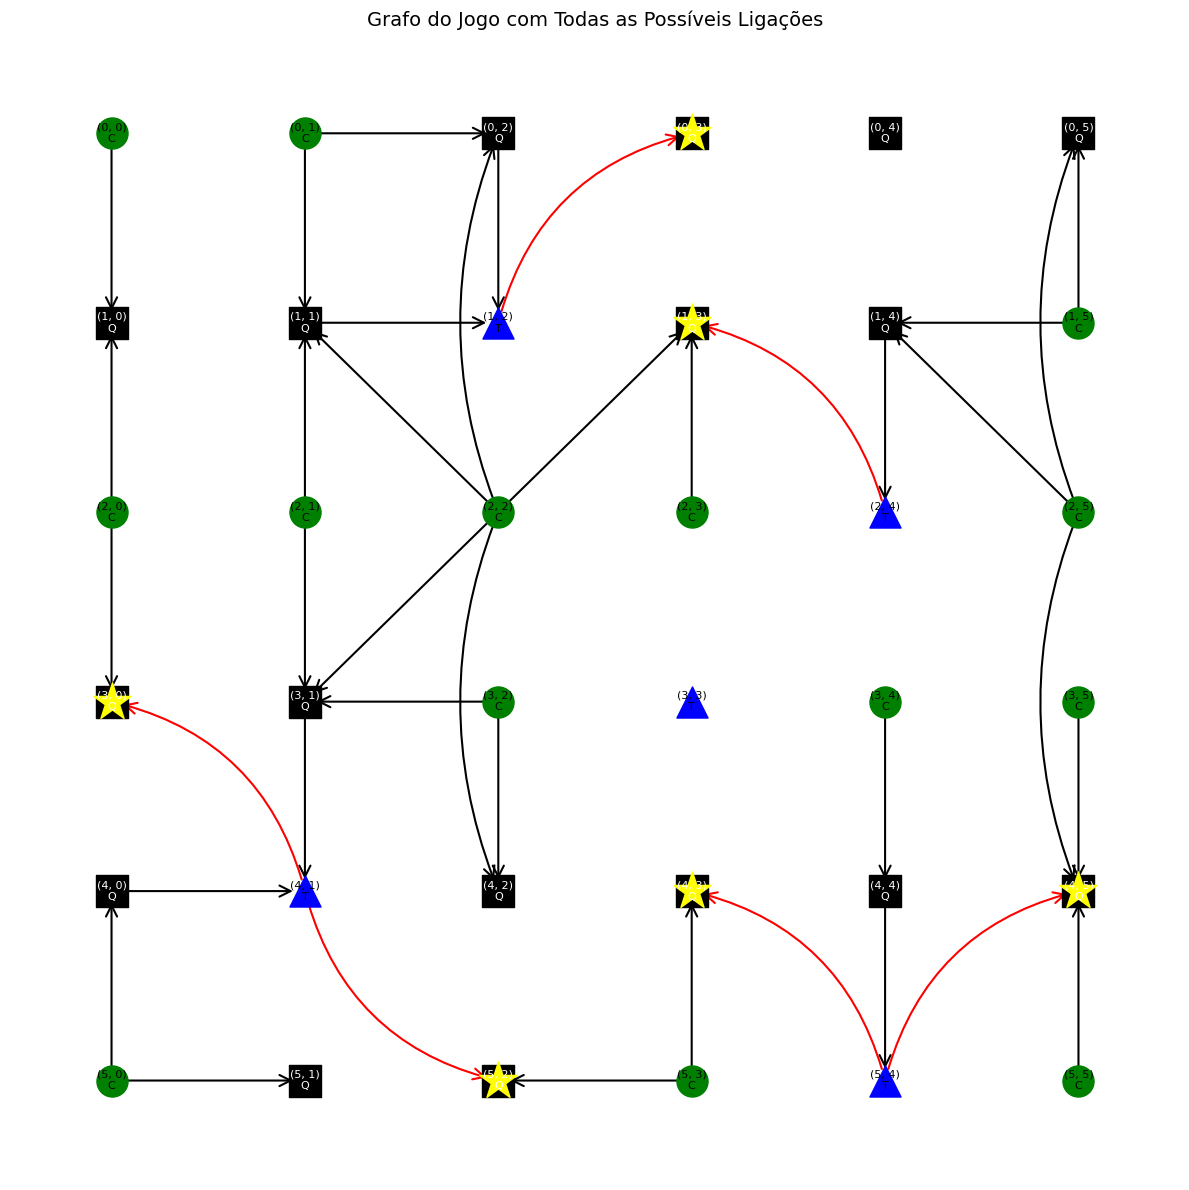

RELATÓRIO DOS GRAUS DE ENTRADA E SAÍDA DOS VÉRTICES

VÉRTICE | TIPO | GRAU ENTRADA | GRAU SAÍDA
---------------------------------------------
(0, 0) | C |      0      |     1     
(0, 1) | C |      0      |     2     
(0, 2) | Q |      2      |     1     
(0, 3) | Q |      1      |     0     
(0, 4) | Q |      0      |     0     
(0, 5) | Q |      2      |     0     
(1, 0) | Q |      2      |     0     
(1, 1) | Q |      3      |     1     
(1, 2) | T |      2      |     1     
(1, 3) | Q |      3      |     0     
(1, 4) | Q |      2      |     1     
(1, 5) | C |      0      |     2     
(2, 0) | C |      0      |     2     
(2, 1) | C |      0      |     2     
(2, 2) | C |      0      |     5     
(2, 3) | C |      0      |     1     
(2, 4) | T |      1      |     1     
(2, 5) | C |      0      |     3     
(3, 0) | Q |      2      |     0     
(3, 1) | Q |      3      |     1     
(3, 2) | C |      0      |     2     
(3, 3) | T |      0      |     0     
(3, 4) | C |      0   

In [15]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

numberToLetter = {1: 'C', 2: 'Q', 3: 'T'}
G = nx.DiGraph()

def gerar_matriz_aleatoria(min_tam=2, max_tam=6):
    n = random.randint(min_tam, max_tam)
    matriz = [[random.randint(1, 3) for _ in range(n)] for _ in range(n)]
    return matriz, n

MATRIZ, tamanho = gerar_matriz_aleatoria(2, 6)

linhas = len(MATRIZ)
colunas = len(MATRIZ[0])

# Adiciona nós com seus tipos
for i in range(linhas):
    for j in range(colunas):
        G.add_node((i, j), shape=MATRIZ[i][j])

# Função para encontrar TODOS os quadrados mais próximos (independentemente da distância)
def encontrar_quadrados_proximos(i, j):
    quadrados = []
    menor_distancia = float('inf')

    # Primeiro, encontrar a menor distância até qualquer quadrado
    for x in range(linhas):
        for y in range(colunas):
            if MATRIZ[x][y] == 2:  # Quadrado
                distancia = abs(x - i) + abs(y - j)  # Distância de Manhattan
                if distancia < menor_distancia:
                    menor_distancia = distancia

    # Agora, coletar todos os quadrados com a menor distância encontrada
    for x in range(linhas):
        for y in range(colunas):
            if MATRIZ[x][y] == 2:  # Quadrado
                distancia = abs(x - i) + abs(y - j)  # Distância de Manhattan
                if distancia == menor_distancia:
                    quadrados.append((x, y))

    return quadrados

# Função para encontrar TODOS os triângulos à direita ou abaixo
def encontrar_triangulos_proximos(i, j):
    direcoes = [(0, 1), (1, 0)]  # Direita e abaixo
    triangulos = []
    for di, dj in direcoes:
        ni, nj = i + di, j + dj
        if 0 <= ni < linhas and 0 <= nj < colunas:
            if MATRIZ[ni][nj] == 3:  # Triângulo
                triangulos.append((ni, nj))
    return triangulos

# Função para encontrar TODOS os quadrados diagonais mais próximos (distância mínima)
def encontrar_quadrados_diagonais(i, j):
    direcoes = [(-1, -1), (-1, 1), (1, -1), (1, 1)]  # Diagonais
    encontrados = []

    for di, dj in direcoes:
        distancia = 1
        while True:
            ni, nj = i + distancia * di, j + distancia * dj
            if 0 <= ni < linhas and 0 <= nj < colunas:
                if MATRIZ[ni][nj] == 2:  # Encontrou quadrado
                    encontrados.append(((ni, nj), distancia))
                    break  # Para nessa direção, mas continua nas outras
            else:
                break  # Sai quando passa do limite da matriz
            distancia += 1

    if not encontrados:
        return []

    # Pega a menor distância
    menor_dist = min(dist for _, dist in encontrados)

    # Retorna apenas os quadrados com a menor distância
    return [pos for pos, dist in encontrados if dist == menor_dist]

# Lista para armazenar os quadrados finais (destino)
quadrados_finais = set()

# Adiciona TODAS as arestas possíveis seguindo as regras
for i in range(linhas):
    for j in range(colunas):
        if MATRIZ[i][j] == 1:  # Círculo
            # Passo 1: Ir para TODOS os quadrados próximos (independentemente da distância)
            for quadrado in encontrar_quadrados_proximos(i, j):
                G.add_edge((i, j), quadrado)

                # Passo 2: Para cada quadrado, ir para TODOS os triângulos próximos
                for triangulo in encontrar_triangulos_proximos(quadrado[0], quadrado[1]):
                    G.add_edge(quadrado, triangulo)

                    # Passo 3: Para cada triângulo, ir para TODOS os quadrados diagonais
                    for quadrado_diag in encontrar_quadrados_diagonais(triangulo[0], triangulo[1]):
                        G.add_edge(triangulo, quadrado_diag)
                        # Adiciona o quadrado diagonal à lista de quadrados finais
                        quadrados_finais.add(quadrado_diag)

# Posicionamento dos nós em grade
pos = {
    (i, j): (j, -i) for i in range(linhas) for j in range(colunas)
}

# --- Desenhar o grafo ---
plt.figure(figsize=(12, 12))

# Formas e cores dos nós
formas = {
    1: ('o', 'green'),    # círculo
    2: ('s', 'black'),    # quadrado
    3: ('^', 'blue'),     # triângulo
    4: ('*', 'yellow')    # estrela
}

# Desenhar nós
for node in G.nodes():
    shape_type = G.nodes[node]['shape']
    shape, color = formas[shape_type]
    nx.draw_networkx_nodes(
        G, pos, nodelist=[node],
        node_color=color,
        node_shape=shape,
        node_size=500
    )

    # Rótulos com coordenadas e tipo
    plt.text(
        pos[node][0], pos[node][1],
        f"{node}\n{numberToLetter[shape_type]}",
        ha='center', va='center',
        color='white' if color == 'black' else 'black',
        fontsize=8
    )

# Desenhar estrelas amarelas sobre os quadrados finais
if quadrados_finais:
    nx.draw_networkx_nodes(
        G, pos, nodelist=list(quadrados_finais),
        node_color='yellow',
        node_shape='*',
        node_size=800
    )

# --- Identificar arestas que passam sobre vértices ---
def aresta_sobrepoe_vertice(u, v):
    # Verifica se a aresta passa sobre algum vértice (não diagonal)
    if u[0] == v[0] or u[1] == v[1]:  # Aresta ortogonal
        # Verifica todos os vértices entre u e v
        if u[0] == v[0]:  # Mesma linha
            min_j, max_j = min(u[1], v[1]), max(u[1], v[1])
            for j in range(min_j + 1, max_j):
                if (u[0], j) in G.nodes() and (u[0], j) != u and (u[0], j) != v:
                    return True
        else:  # Mesma coluna
            min_i, max_i = min(u[0], v[0]), max(u[0], v[0])
            for i in range(min_i + 1, max_i):
                if (i, u[1]) in G.nodes() and (i, u[1]) != u and (i, u[1]) != v:
                    return True
    return False

# --- Separar arestas em diferentes categorias ---
edges_normais = []
edges_diagonais = []
edges_sobrepostas = []  # Arestas que passam sobre vértices
curvaturas = {}

for u, v in G.edges():
    # Se for triângulo -> quadrado em diagonal
    if MATRIZ[u[0]][u[1]] == 3 and MATRIZ[v[0]][v[1]] == 2 and abs(u[0] - v[0]) == abs(u[1] - v[1]):
        edges_diagonais.append((u, v))

        # Descobre a direção da diagonal
        di = v[0] - u[0]
        dj = v[1] - u[1]

        if (di > 0 and dj > 0) or (di < 0 and dj < 0):  # ↘ ou ↖
            curvaturas[(u, v)] = 0.3
        else:  # ↗ ou ↙
            curvaturas[(u, v)] = -0.3
    # Verifica se a aresta passa sobre algum vértice
    elif aresta_sobrepoe_vertice(u, v):
        edges_sobrepostas.append((u, v))
        # Define curvatura baseada na direção
        if u[0] == v[0]:  # Horizontal
            curvaturas[(u, v)] = 0.2 if u[1] < v[1] else -0.2
        else:  # Vertical
            curvaturas[(u, v)] = 0.2 if u[0] < v[0] else -0.2
    else:
        edges_normais.append((u, v))

# Arestas normais (reta)
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges_normais,
    arrowstyle='->',
    arrowsize=20,
    width=1.5,
    connectionstyle="arc3,rad=0.0"
)

# Arestas diagonais (curvadas em sentidos opostos)
for (u, v) in edges_diagonais:
    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v)],
        arrowstyle='->',
        arrowsize=20,
        width=1.5,
        edge_color="red",  # destacar diagonais
        connectionstyle=f"arc3,rad={curvaturas[(u, v)]}"
    )

# Arestas que passam sobre vértices (curvadas)
for (u, v) in edges_sobrepostas:
    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v)],
        arrowstyle='->',
        arrowsize=20,
        width=1.5,
        edge_color="black",  # destacar arestas sobrepostas
        connectionstyle=f"arc3,rad={curvaturas[(u, v)]}"
    )

# Ajustes finais
plt.axis('off')
plt.title("Grafo do Jogo com Todas as Possíveis Ligações", fontsize=14)
plt.tight_layout()
plt.show()

# Relatório dos graus de entrada e saída de cada vértice
print("=" * 80)
print("RELATÓRIO DOS GRAUS DE ENTRADA E SAÍDA DOS VÉRTICES")
print("=" * 80)

# Dicionários para armazenar graus de entrada e saída
grau_entrada = {node: 0 for node in G.nodes()}
grau_saida = {node: 0 for node in G.nodes()}

# Calcular graus de entrada e saída
for u, v in G.edges():
    grau_saida[u] += 1  # Vértice u tem uma aresta saindo
    grau_entrada[v] += 1  # Vértice v tem uma aresta entrando

print("\nVÉRTICE | TIPO | GRAU ENTRADA | GRAU SAÍDA")
print("-" * 45)

# Ordenar vértices por posição (linha, coluna)
vertices_ordenados = sorted(G.nodes(), key=lambda x: (x[0], x[1]))

for node in vertices_ordenados:
    tipo = numberToLetter[MATRIZ[node[0]][node[1]]]
    entrada = grau_entrada[node]
    saida = grau_saida[node]
    print(f"{node} | {tipo} | {entrada:^11} | {saida:^10}")

print("\n" + "=" * 80)

RELATÓRIO DOS GRAUS DE ENTRADA E SAÍDA DOS VÉRTICES

VÉRTICE | TIPO | GRAU ENTRADA | GRAU SAÍDA
---------------------------------------------
(0, 0) | T |      0      |     0     
(0, 1) | Q |      1      |     0     
(0, 2) | C |      0      |     2     
(0, 3) | Q |      2      |     1     
(0, 4) | T |      1      |     1     
(0, 5) | T |      0      |     0     
(1, 0) | T |      0      |     0     
(1, 1) | Q |      2      |     1     
(1, 2) | C |      0      |     1     
(1, 3) | C |      0      |     3     
(1, 4) | Q |      2      |     1     
(1, 5) | T |      1      |     1     
(2, 0) | C |      0      |     1     
(2, 1) | T |      1      |     1     
(2, 2) | C |      0      |     1     
(2, 3) | Q |      3      |     1     
(2, 4) | C |      0      |     3     
(2, 5) | Q |      3      |     0     
(3, 0) | Q |      2      |     1     
(3, 1) | T |      1      |     2     
(3, 2) | T |      0      |     0     
(3, 3) | T |      1      |     1     
(3, 4) | T |      0   